## Importing Library

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import folium

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, ward, average, complete
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

## Importing Dataset 

In [121]:
df = pd.read_csv('Modeling.csv')
df

,Nama Kecamatan,speed_kmh,length,delay
0,MATRAMAN,23,1682,143
1,JATINEGARA,20,1443,154
2,TEBET,20,1407,146
3,TANAH ABANG,20,1669,189
4,MENTENG,20,1604,139
5,CEMPAKA PUTIH,19,1105,113
6,GAMBIR,19,1820,199
7,GROGOL PETAMBURAN,18,1561,187
8,SENEN,18,1095,141
9,KELAPA GADING,18,1399,158


In [3]:
df['speed_kmh'].mean()

16.023809523809526

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Nama Kecamatan  42 non-null     object
 1   speed_kmh       42 non-null     int64 
 2   length          42 non-null     int64 
 3   delay           42 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.4+ KB


## Model

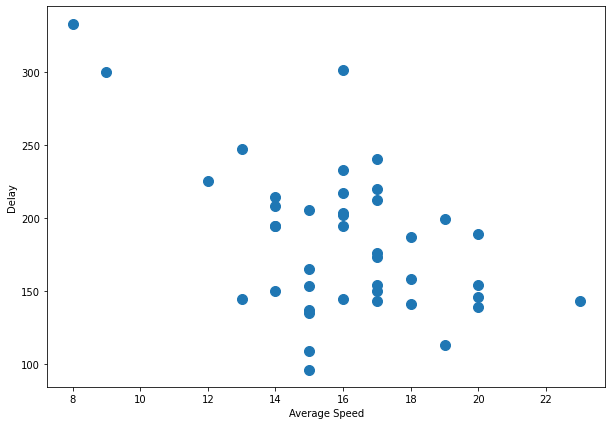

In [4]:
plt.figure(figsize=(10,7))
plt.scatter(df['speed_kmh'], df['delay'],s=100)
plt.xlabel('Average Speed')
plt.ylabel('Delay')
plt.show()

- K-Means

C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


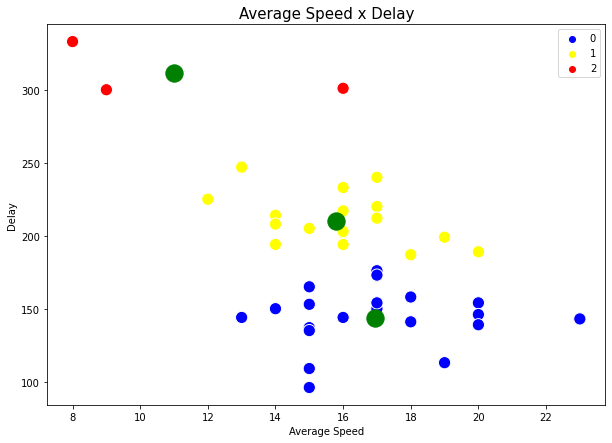

In [114]:
dfk1 = df.loc[:,['speed_kmh','delay']]

kmeans = KMeans(n_clusters = 3)
kmeans.fit(dfk1)
labels = kmeans.predict(dfk1)

plt.figure(figsize=(10,7))
sns.scatterplot(dfk1['speed_kmh'],dfk1['delay'],hue = labels,s= 150, palette=['Blue','Yellow','Red'])
plt.xlabel('Average Speed')
plt.ylabel('Delay')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'g')
plt.title('Average Speed x Delay',size=15)
plt.show()

C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


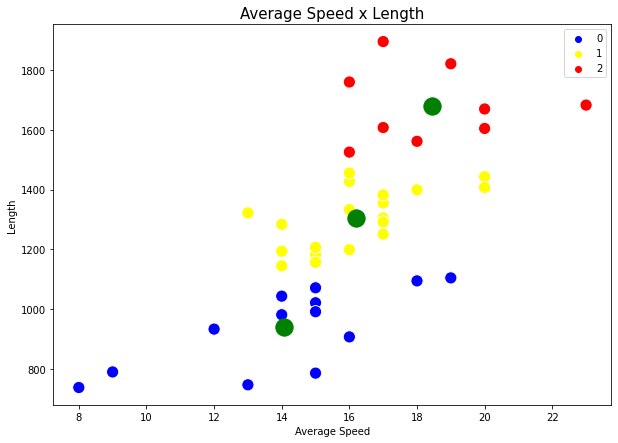

In [90]:
dfk2 = df.loc[:,['speed_kmh','length']]

kmeans = KMeans(n_clusters = 3)
kmeans.fit(dfk2)
labels = kmeans.predict(dfk2)

plt.figure(figsize=(10,7))
sns.scatterplot(dfk2['speed_kmh'],dfk2['length'],hue = labels,s= 150, palette=['Blue','Yellow','Red'])
plt.xlabel('Average Speed')
plt.ylabel('Length')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'g')
plt.title('Average Speed x Length',size=15)
plt.show()

C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


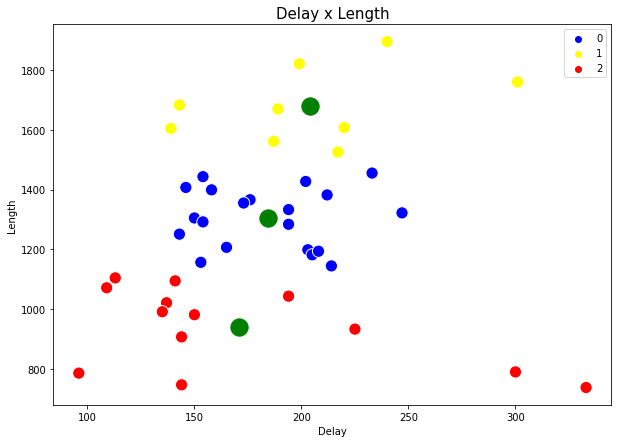

In [91]:
dfk3 = df.loc[:,['delay','length']]

kmeans = KMeans(n_clusters = 3)
kmeans.fit(dfk3)
labels = kmeans.predict(dfk3)

plt.figure(figsize=(10,7))
sns.scatterplot(dfk3['delay'],dfk3['length'],hue = labels,s= 150, palette=['Blue','Yellow','Red'])
plt.xlabel('Delay')
plt.ylabel('Length')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'g')
plt.title('Delay x Length',size=15)
plt.show()

- Agglomerative

C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


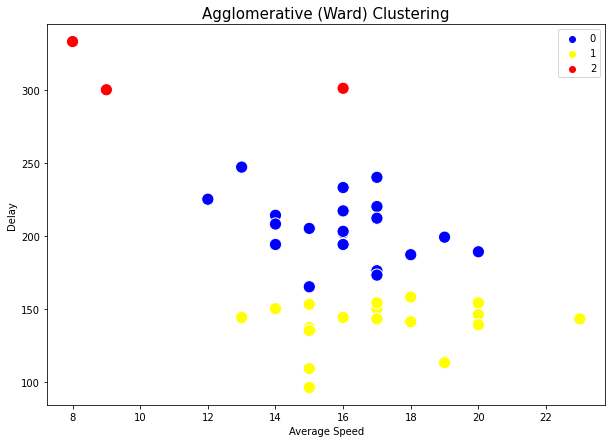

In [96]:
ward = AgglomerativeClustering(linkage= 'ward', n_clusters= 3 )
ward.fit(dfk1)
labels = ward.fit_predict(dfk1)

plt.figure(figsize=(10,7))
sns.scatterplot(dfk1['speed_kmh'],dfk1['delay'],hue = labels,s= 150, palette=['Blue','Yellow','Red'])
plt.xlabel('Average Speed')
plt.ylabel('Delay')
plt.title('Agglomerative (Ward) Clustering',size=15)
plt.show()

C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


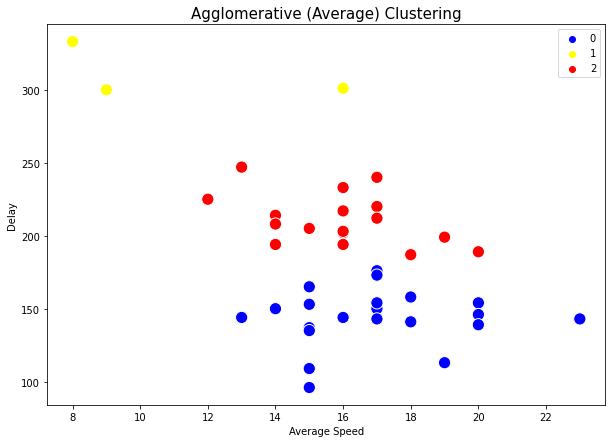

In [98]:
avg = AgglomerativeClustering(linkage= 'average', n_clusters= 3 )
avg.fit(dfk1)
labels = avg.fit_predict(dfk1)

plt.figure(figsize=(10,7))
sns.scatterplot(dfk1['speed_kmh'],dfk1['delay'],hue = labels,s= 150, palette=['Blue','Yellow','Red'])
plt.xlabel('Average Speed')
plt.ylabel('Delay')
plt.title('Agglomerative (Average) Clustering',size=15)
plt.show()

C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


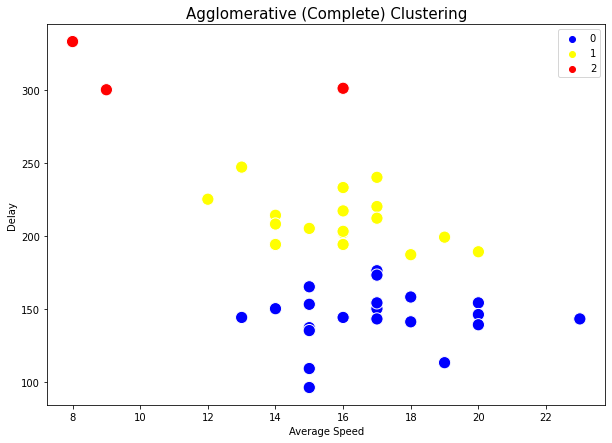

In [100]:
cpt = AgglomerativeClustering(linkage= 'complete', n_clusters= 3 )
cpt.fit(dfk1)
labels = cpt.fit_predict(dfk1)

plt.figure(figsize=(10,7))
sns.scatterplot(dfk1['speed_kmh'],dfk1['delay'],hue = labels,s= 150, palette=['Blue','Yellow','Red'])
plt.xlabel('Average Speed')
plt.ylabel('Delay')
plt.title('Agglomerative (Complete) Clustering',size=15)
plt.show()

- DBSCAN

C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


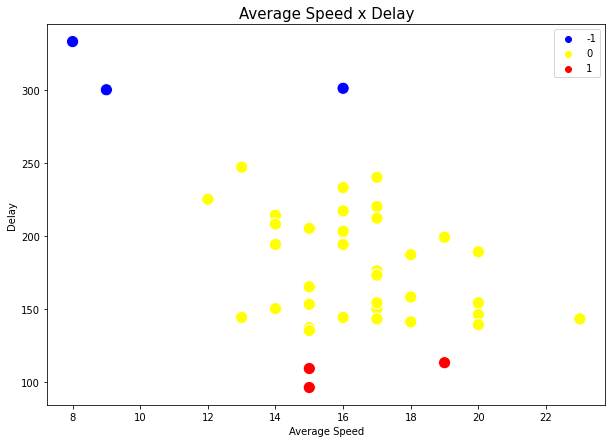

In [111]:
dbscan = DBSCAN(eps = 20, min_samples= 3)
dbscan.fit(dfk1)
labels = dbscan.fit_predict(dfk1)

plt.figure(figsize=(10,7))
sns.scatterplot(dfk1['speed_kmh'],dfk1['delay'],hue = labels,s= 150, palette=['Blue','Yellow','Red'])
plt.xlabel('Average Speed')
plt.ylabel('Delay')
plt.title('Average Speed x Delay',size=15)
plt.show()

C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


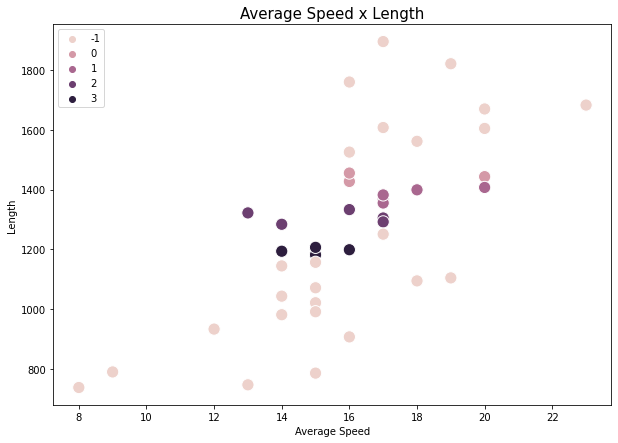

In [109]:
dbscan = DBSCAN(eps = 20, min_samples= 3)
dbscan.fit(dfk2)
labels = dbscan.fit_predict(dfk2)

plt.figure(figsize=(10,7))
sns.scatterplot(dfk2['speed_kmh'],dfk2['length'],hue = labels,s= 150)
plt.xlabel('Average Speed')
plt.ylabel('Length')
plt.title('Average Speed x Length',size=15)
plt.show()

C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


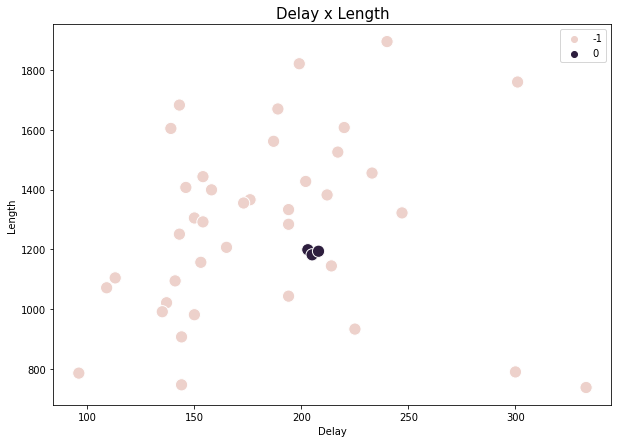

In [108]:
dbscan = DBSCAN(eps = 20, min_samples= 3)
dbscan.fit(dfk3)
labels = dbscan.fit_predict(dfk3)

plt.figure(figsize=(10,7))
sns.scatterplot(dfk3['delay'],dfk3['length'],hue = labels,s= 150)
plt.xlabel('Delay')
plt.ylabel('Length')
plt.title('Delay x Length',size=15)
plt.show()

## Model Evaluation

- Elbow

In [108]:
def cluster_evaluation(number_of_cluster):
  # clustering variation
  clusterings = [KMeans(n_clusters=k).fit(dfk1) for k in number_of_cluster]
  centroids = [k.cluster_centers_ for k in clusterings]

  # within sumsq
  D_k = [cdist(dfk1, cent, 'euclidean') for cent in centroids] 
  cIdx = [np.argmin(D, axis=1) for D in D_k] 
  dist = [np.min(D, axis=1) for D in D_k] 
  avgWithinSS = [sum(d)/dfk1.shape[0] for d in dist] 

  return avgWithinSS

In [109]:
number_of_cluster = range(2,11) # mencoba nanti 2 --> 3 --> 4 ... 10, lalu dilihat perubahannya
avg_withinsq = cluster_evaluation(number_of_cluster) 

C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


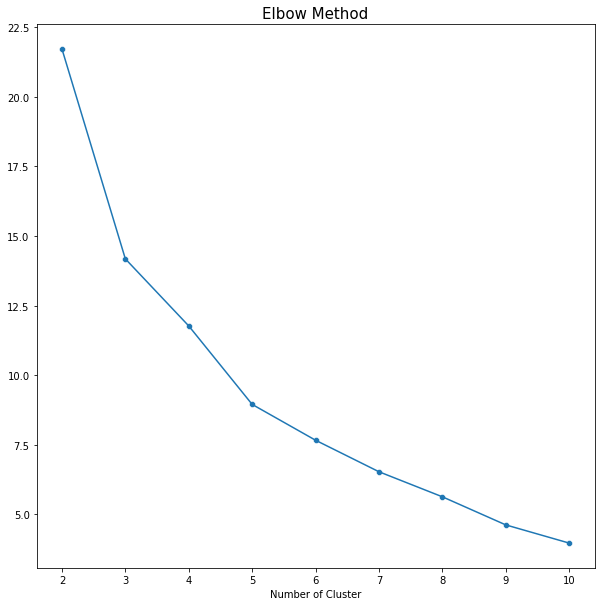

In [110]:
plt.figure(figsize=(10,10))

sns.scatterplot(number_of_cluster, avg_withinsq)
sns.lineplot(number_of_cluster, avg_withinsq)

plt.xlabel('Number of Cluster')
plt.title('Elbow Method',size=15)
plt.show()

- Silhouette

In [105]:
score = []
number_of_cluster = range(2,11)

for i in number_of_cluster:
    kmeans = KMeans(n_clusters= i)
    kmeans.fit(dfk1)
    
    label = kmeans.labels_
    score.append(silhouette_score(dfk1, label, metric= 'euclidean')) 

C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


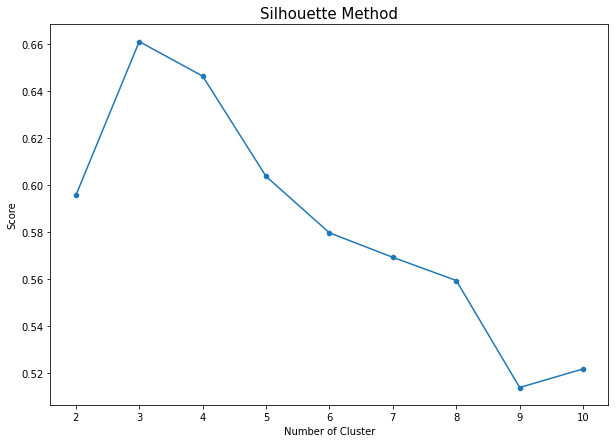

In [106]:
plt.figure(figsize=(10,7))

sns.scatterplot(number_of_cluster, score)
sns.lineplot(number_of_cluster, score)

plt.xlabel('Number of Cluster')
plt.ylabel('Score')
plt.title('Silhouette Method',size=15)
plt.show()

In [46]:
silhouette_score(dfk1, labels)

0.661206555166637

## Result

In [122]:
kmeans.labels_

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 2, 2])

In [123]:
df['Cluster'] = kmeans.labels_

In [124]:
df.head(5)

,Nama Kecamatan,speed_kmh,length,delay,Cluster
0,MATRAMAN,23,1682,143,0
1,JATINEGARA,20,1443,154,0
2,TEBET,20,1407,146,0
3,TANAH ABANG,20,1669,189,1
4,MENTENG,20,1604,139,0


In [125]:
df['Nama Kecamatan'].replace('KALI DERES','KALIDERES', inplace = True)

In [126]:
info = {'Cluster': [0,1,2], 'Mobilitas': ['Lenggang', 'Sedang', 'Padat']}
df_info = pd.DataFrame(data=info)
df = pd.merge(df,df_info,how ='left',on='Cluster')

In [138]:
df.sort_values(by='Mobilitas')

,Nama Kecamatan,speed_kmh,length,delay,Cluster,Mobilitas
0,MATRAMAN,23,1682,143,0,Lenggang
27,PULO GADUNG,15,1022,137,0,Lenggang
28,TAMBORA,15,1207,165,0,Lenggang
16,CIPAYUNG,17,1251,143,0,Lenggang
15,KOJA,17,1292,154,0,Lenggang
14,KEBON JERUK,17,1355,173,0,Lenggang
13,CILANDAK,17,1366,176,0,Lenggang
12,KALIDERES,17,1305,150,0,Lenggang
29,TAMAN SARI,15,787,96,0,Lenggang
26,JOHAR BARU,15,1072,109,0,Lenggang


In [130]:
# Characteristic
df[df['Mobilitas'] == 'Lenggang'].mean()

speed_kmh      16.952381
length       1199.000000
delay         143.952381
Cluster         0.000000
dtype: float64

In [131]:
df[df['Mobilitas'] == 'Sedang'].mean()

speed_kmh      15.777778
length       1387.611111
delay         210.166667
Cluster         1.000000
dtype: float64

In [133]:
df[df['Mobilitas'] == 'Padat'].mean()

speed_kmh      11.000000
length       1096.333333
delay         311.333333
Cluster         2.000000
dtype: float64

In [36]:
df.to_csv('Mobility Cluster.csv')